# Data Cleaning

In [1]:
import pandas as pd
import glob

# path = r'C:\DRO\DCL_rawdata_files' # use your path
all_files = glob.glob("*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

df = pd.concat(li, axis=0, ignore_index=True)

/Users/Kevin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  del sys.path[0]


In [19]:
df = df[df.duplicated()==False]

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12064 entries, 0 to 19205
Data columns (total 11 columns):
                   12064 non-null object
Instrument Date    12064 non-null object
District           12064 non-null object
Property           12064 non-null object
Floor              12064 non-null object
Unit               12064 non-null object
Area               12064 non-null object
Price              12064 non-null object
Price/sq.ft.       12064 non-null object
Source             12064 non-null object
Unnamed: 10        12064 non-null object
dtypes: object(11)
memory usage: 1.1+ MB


In [21]:
df.head()

,,Instrument Date,District,Property,Floor,Unit,Area,Price,Price/sq.ft.,Source,Unnamed: 10
0,,17/01/2019,Shek Mun,"No. 0019, New Commerce Centre, On Sum Street, ...",11,12,"Approx. 1,053 sq.ft.","For Rent $15,269",@$15,Land Registry,Latest Stock
1,,17/01/2019,Tsim Sha Tsui East,"No. 0014, New Mandarin Plaza Tower A, Science ...",12,7,Approx. 991 sq.ft.,"For Rent $29,200",@$29,Market,Latest Stock
2,,17/01/2019,Wan Chai,"No. 0199, Tiffan Tower, Wan Chai Road, Wan Cha...",1,WF,"Approx. 3,342 sq.ft.","For Rent $177,126",@$53,Market,Latest Stock
3,,17/01/2019,Kwun Tong,"No. 0010, TG Place, Shing Yip Street, Kwun Ton...",20,G,"Approx. 1,787 sq.ft.","For Rent $53,800",@$30,Market,Latest Stock
4,,02/01/2019,Kwun Tong,"Shop 3 on G/F, , No.0001 Horse Shoe Lane, Kwun...",-,-,Approx. 600 sq.ft.,"For Rent $73,000",@$122,Market,Latest Stock


In [22]:
df = df.iloc[:,:-1]

In [34]:
df['Price'][0]

'For Rent $15,269'

In [40]:
df['Price'] = df['Price'].str.replace('For Rent \$', '').str.replace(',','')

In [52]:
df['Price'][df['Price'].str.contains('[A-Z]') == True].str.replace('M','').astype('float').apply(lambda x: x*1000000)

84       1040000.0
112      1130000.0
235      1230000.0
362      1930000.0
678      1100000.0
850      1340000.0
878      1100000.0
902      1600000.0
1344     2610000.0
1421     1050000.0
1444     1190000.0
1681     1080000.0
1896     2810000.0
1964     1200000.0
2402     2000000.0
2803     1000000.0
2914     2870000.0
2921     1290000.0
2976     1090000.0
3179     1270000.0
3294     3550000.0
3729     1070000.0
3730     1070000.0
3736     1010000.0
3761     1000000.0
3795     1100000.0
3863     1310000.0
3876     2020000.0
4136     1390000.0
4148     1040000.0
           ...    
11738    1740000.0
11763    4730000.0
12433    2500000.0
12459    1170000.0
12467    3450000.0
12531    1200000.0
12618    1500000.0
13127    1060000.0
13128    1320000.0
13131    1320000.0
13388    2150000.0
13746    1160000.0
13761    1410000.0
13973    2000000.0
14219    1040000.0
14343    1150000.0
14552    1600000.0
14826    1130000.0
14827    1080000.0
14977    2320000.0
15634    1100000.0
16041    110

In [54]:
df['Price'][df['Price'].str.contains('[A-Z]') == True] = df['Price'][df['Price'].str.contains('[A-Z]') == True].str.replace('M','').astype('float').apply(lambda x: x*1000000)

In [59]:
df['Price'] = df['Price'].astype(float)

In [65]:
df['Area']=df['Area'].str.replace('Approx. ','').str.replace(' sq.ft.','').str.replace(',','')

In [67]:
df['Area'] = df['Area'].astype(int)

In [70]:
df.columns = [' ', 'instrument date', 'district', 'property', 'floor', 'unit', 'area_sq.ft.',
       'price', 'price/sq.ft.', 'source']

In [72]:
df.head()

,,instrument date,district,property,floor,unit,area_sq.ft.,price,price/sq.ft.,source
0,,17/01/2019,Shek Mun,"No. 0019, New Commerce Centre, On Sum Street, ...",11,12,1053,15269.0,@$15,Land Registry
1,,17/01/2019,Tsim Sha Tsui East,"No. 0014, New Mandarin Plaza Tower A, Science ...",12,7,991,29200.0,@$29,Market
2,,17/01/2019,Wan Chai,"No. 0199, Tiffan Tower, Wan Chai Road, Wan Cha...",1,WF,3342,177126.0,@$53,Market
3,,17/01/2019,Kwun Tong,"No. 0010, TG Place, Shing Yip Street, Kwun Ton...",20,G,1787,53800.0,@$30,Market
4,,02/01/2019,Kwun Tong,"Shop 3 on G/F, , No.0001 Horse Shoe Lane, Kwun...",-,-,600,73000.0,@$122,Market


In [73]:
df['property'][0]

'No. 0019, New Commerce Centre, On Sum Street, Shek Mun, New Territories'

In [83]:
import requests
import json
def get_xy_from_address(address):
    
    address_clean = address.split(",")[-4:]
    address_clean_clean = "".join(i for i in address_clean)
    
    url = "https://geodata.gov.hk/gs/api/v1.0.0/locationSearch?q=" + str(address_clean_clean)    
    r = requests.get(url)
    
    if r.status_code == 200:
        addresses = json.loads(r.text)
        first_address = addresses[0] #returns a list of json, just use the first one
        e = first_address['x']
        n = first_address['y']
        return e,n
    else: return "request_failed"

In [75]:
def get_long_lat_from_north_east(north_east_str):
    # north_east_str = df.iloc[0]["xy"]
    
#     if type(north_east_str) == str:
    if type(north_east_str) == str and north_east_str.startswith("(") and north_east_str.endswith(")"):
        e,n = literal_eval(north_east_str)
    elif type(north_east_str) == tuple:
        e,n = north_east_str
    else: return "request_failed"
        
    url = f"http://www.geodetic.gov.hk/transform/v2/?inSys=hkgrid&e={e}&n={n}"
    r = requests.get(url)
    
    if r.status_code == 200:
        data = json.loads(r.text)
        # using hklong and lat causes problems
#         long = data['hkLong']
#         lat = data['hkLat']
        long = data['wgsLong']
        lat = data['wgsLat']
        return long,lat
    else: return "request_failed"

In [84]:
get_xy_from_address(df['property'][0])

(839386, 827766)

In [85]:
get_long_lat_from_north_east(get_xy_from_address(df['property'][0]))

(114.207152656, 22.389131207)

In [87]:
df['e_n'] = df['property'].apply(lambda x: get_xy_from_address(x))

In [90]:
df.to_csv('data_with_e_n.csv')

In [91]:
df['long_lat'] = df['e_n'].apply(lambda x: get_long_lat_from_north_east(x))

In [93]:
# df.to_csv('data_all.csv')

# Load Data and Plot

In [144]:
df = pd.read_csv('data_all.csv', index_col=0)

In [145]:
df['price/sq.ft.'] = df['price']/df['area_sq.ft.']

In [146]:
df.long_lat[0].split(',')[1].replace('(','')

' 22.389131207)'

In [147]:
df['long'] = df['long_lat'].apply(lambda x :x.split(',')[0].replace('(',''))

In [148]:
df['lat'] = df['long_lat'].apply(lambda x: x.split(',')[-1].replace(')',''))

In [149]:
df = df[df['long'] != 'request_failed']

In [150]:
df = df[df['lat'] != 'request_failed']

In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11990 entries, 0 to 19205
Data columns (total 14 columns):
                   11990 non-null object
instrument date    11990 non-null object
district           11990 non-null object
property           11990 non-null object
floor              11990 non-null object
unit               11990 non-null object
area_sq.ft.        11990 non-null int64
price              11990 non-null float64
price/sq.ft.       11990 non-null float64
source             11990 non-null object
e_n                11990 non-null object
long_lat           11990 non-null object
long               11990 non-null object
lat                11990 non-null object
dtypes: float64(2), int64(1), object(11)
memory usage: 1.4+ MB


In [158]:
df.sample(n=1000, random_state=1).sort_values('price/sq.ft.', ascending=False)

,,instrument date,district,property,floor,unit,area_sq.ft.,price,price/sq.ft.,source,e_n,long_lat,long,lat
17002,,31/01/2019,Causeway Bay,"Shop 2 on G/F, , Ying Kong Mansion, No.0002-00...",-,-,400,400000.0,1000.000000,Market,"(837274.98638, 815627.81074)","(114.186645352, 22.279518889)",114.186645352,22.279518889
559,,28/01/2019,Causeway Bay,"Shop G,J on G/F, , No.0077-0083 Percival Stree...",-,-,750,650000.0,866.666667,Market,"(836917.65882, 815547.85053)","(114.183178094, 22.278796969)",114.183178094,22.278796969
10605,,04/01/2019,Mong Kok,"Shop on G/F, , M/F & 1/F, No.0002A-0002B Argy...",-,-,61,47000.0,770.491803,Market,"(814545.9, 826107)","(113.965958538, 22.374015017)",113.965958538,22.374015017
7870,,19/02/2019,Tsim Sha Tsui,"Shop 1 on G/F, , Hai Phong Mansion, No.0099-01...",-,-,2096,1100000.0,524.809160,Land Registry,"(835742, 817677)","(114.171769791, 22.298024573)",114.171769791,22.298024573
11960,,27/03/2019,Tsim Sha Tsui,"Shop A1 on G/F, , Houng Sun Building, No.0045-...",-,-,600,280000.0,466.666667,Market,"(835941, 817820)","(114.173700956, 22.299316)",114.173700956,22.299316
14620,,20/09/2019,Tsuen Wan,"Shop A155 on 1/F, Nan Fung Centre, No.0264-029...",-,-,96,40000.0,416.666667,Market,"(830050.1, 826050.4)","(114.116500289, 22.373630033)",114.116500289,22.373630033
14152,,18/03/2019,Sheung Shui,"Shop 215 on , Landmark North, No.0039 Lung Sum...",-,-,318,120840.0,380.000000,Land Registry,"(831221.2, 840334.6)","(114.127826055, 22.502626753)",114.127826055,22.502626753
10070,,13/04/2019,Tai Wai,"Shop 6 on G/F, , Tin Po Bldg, No.0094-0102 Tai...",-,-,300,100000.0,333.333333,Market,"(836453, 826101)","(114.178670682, 22.374098214)",114.178670682,22.374098214
11216,,03/06/2019,Central,"Shop 1 on G/F, , Tak Woo House, No.0017-0019 D...",-,-,610,200000.0,327.868852,Market,"(834050.8214, 815717.93718)","(114.155360465, 22.280331666)",114.155360465,22.280331666
1420,,18/04/2019,Sheung Shui,"Shop A on G/F, , No.0014 Fu Hing Street, Sheun...",-,-,500,160000.0,320.000000,Market,"(831403.25, 840575.09375)","(114.129594607, 22.504799033)",114.129594607,22.504799033


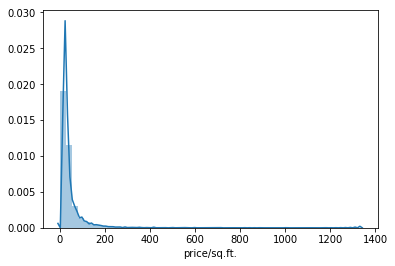

In [167]:
import seaborn as sns
%matplotlib inline

sns.distplot(df['price/sq.ft.'])

In [177]:
df['price/sq.ft.'].median()

26.14432335202624

In [127]:
import folium
import folium.plugins as plugins

In [128]:
lon, lat = 22.3964, 114.1095
hk_map = folium.Map(location=[lon, lat],
                   tiles='cartodbpositron', zoom_start=11)

#add area overlays
# folium.GeoJson(geojson).add_to(hk_map)
hk_map

In [168]:
import branca

# Make an empty map
m = folium.Map(location=[lon,lat], zoom_start=11,tiles="cartodbpositron")

data = df.sample(n=1000, random_state=1).sort_values('price/sq.ft.', ascending=False)
colormap = branca.colormap.LinearColormap(colors=['green','red'],vmin=2,vmax=200)
colormap

# I can add marker one by one on the map
for i in range(0,1000):
    
   folium.CircleMarker(location=[float(data.iloc[i]['lat']), float(data.iloc[i]['long'])],
                        radius=1,
                       color=colormap(data.iloc[i]['price/sq.ft.']),
                       fill=True,
                        fill_color=colormap(data.iloc[i]['price/sq.ft.'])
                       ).add_to(m)

# folium.LayerControl().add_to(m)
m

In [90]:
colorscale = branca.colormap.linear.YlOrRd_09.scale(0, 50e3)

In [97]:
colorscale

https://stackoverflow.com/questions/47846744/create-an-asymmetric-colormap

In [96]:
colorscale(0)

'#ffffcc'

In [164]:
colormap = branca.colormap.LinearColormap(colors=['green','red'],vmin=min(df['price/sq.ft.']),vmax=max(df['price/sq.ft.']))
colormap

In [99]:
branca.colormap.linear?

In [110]:
max(df['price/sq.ft.'])

1333.3333333333333

In [170]:
df[df['floor']=='-'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2136 entries, 4 to 19186
Data columns (total 14 columns):
                   2136 non-null object
instrument date    2136 non-null object
district           2136 non-null object
property           2136 non-null object
floor              2136 non-null object
unit               2136 non-null object
area_sq.ft.        2136 non-null int64
price              2136 non-null float64
price/sq.ft.       2136 non-null float64
source             2136 non-null object
e_n                2136 non-null object
long_lat           2136 non-null object
long               2136 non-null object
lat                2136 non-null object
dtypes: float64(2), int64(1), object(11)
memory usage: 250.3+ KB


In [160]:
df.sort_values('price/sq.ft.')

,,instrument date,district,property,floor,unit,area_sq.ft.,price,price/sq.ft.,source,e_n,long_lat,long,lat
8524,,06/11/2019,Kwai Chung,"No. 313-317, The Galaxy, Castle Peak Road, Kwa...",22,W/F,6896,18.0,0.002610,Market,"(831257.614, 824237.62)","(114.128230594, 22.357263597)",114.128230594,22.357263597
8519,,06/11/2019,Cheung Sha Wan,"No. 10, Billion Plaza 2, Cheung Yue Street, Ch...",9,A,3323,26.0,0.007824,Market,"(833582, 822007)","(114.150800841, 22.337125044)",114.150800841,22.337125044
14976,,28/11/2018,Site-Fanling/SheungShiu,"No. , D.D.87, Others, Site-Fanling/SheungShiu,...",LOT,395-399,23500,45000.0,1.914894,Market,"(834162, 814576)","(114.156440755, 22.270019378)",114.156440755,22.270019378
8770,,01/01/2019,Site-Tuen Mun,"No. , D.D.132, Kei Lun Wai, Site-Tuen Mun, New...",V,Lot258,15000,30000.0,2.000000,Market,"(816517, 830886)","(113.985038125, 22.417195383)",113.985038125,22.417195383
17740,,01/03/2019,Tsim Sha Tsui East,"No. 14, New Mandarin Plaza Tower B, Science Mu...",10,10-15,6341,18000.0,2.838669,Market,"(836456, 817961)","(114.178698832, 22.300589337)",114.178698832,22.300589337
15109,,26/02/2019,Kwai Chung,"No. 40-44, Yam Hop Hing Industrial Building, K...",2,2,9419,27745.0,2.945642,Land Registry,"(831863.17675, 825316.506680001)","(114.13410678, 22.367008189)",114.13410678,22.367008189
10988,,04/06/2019,Site-Yuen Long,"No. , D.D.115, Shan Pui, Site-Yuen Long, New T...",U,Lot751,30000,90000.0,3.000000,Market,"(820777, 833757)","(114.026386317, 22.44316559)",114.026386317,22.44316559
896,,06/11/2019,Yau Tong,"Shop A,B on 3/F, 4/F, Mai Tong Industrial Buil...",-,-,34000,130000.0,3.823529,Market,"(842399, 817114)","(114.236370427, 22.29292949)",114.236370427,22.29292949
8761,,01/01/2019,Site-Yuen Long,"No. , D.D.102, Ki Lun Shan, Site-Yuen Long, Ne...",OS,"Lot558,559,560A",6400,28000.0,4.375000,Market,"(820777, 833757)","(114.026386317, 22.44316559)",114.026386317,22.44316559
17245,,23/01/2019,Cheung Sha Wan,"No. 777-779, Tin On Industrial Building, Cheun...",8,A01,7250,32900.0,4.537931,Land Registry,"(833547, 822073)","(114.150460977, 22.337721007)",114.150460977,22.337721007


In [172]:
df[df['floor']=='-'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2136 entries, 4 to 19186
Data columns (total 14 columns):
                   2136 non-null object
instrument date    2136 non-null object
district           2136 non-null object
property           2136 non-null object
floor              2136 non-null object
unit               2136 non-null object
area_sq.ft.        2136 non-null int64
price              2136 non-null float64
price/sq.ft.       2136 non-null float64
source             2136 non-null object
e_n                2136 non-null object
long_lat           2136 non-null object
long               2136 non-null object
lat                2136 non-null object
dtypes: float64(2), int64(1), object(11)
memory usage: 250.3+ KB


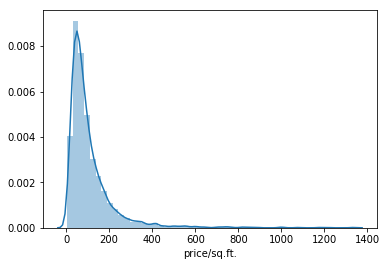

In [174]:
sns.distplot(df[df['floor']=='-']['price/sq.ft.'])

In [208]:
import branca
fg = folium.FeatureGroup()

# Make an empty map
m = folium.Map(location=[lon,lat], zoom_start=11,tiles="cartodbpositron")


fg = folium.FeatureGroup(name='G/F only')
data = df[df['floor']=='-']
colormap1 = branca.colormap.LinearColormap(colors=['green','yellow','red'], index=[0,(data['price/sq.ft.']).median(),max(data['price/sq.ft.'])],
                                          vmin=min(data['price/sq.ft.']),vmax=max(data['price/sq.ft.']))

# I can add marker one by one on the map
for i in range(0,len(data)):
    
   folium.CircleMarker(location=[float(data.iloc[i]['lat']), float(data.iloc[i]['long'])],
                        radius=2,
                       color=colormap(data.iloc[i]['price/sq.ft.']),
                       fill=True,
                        fill_color=colormap(data.iloc[i]['price/sq.ft.'])
                       ).add_to(fg)



fg2 = folium.FeatureGroup(name='All leased')
# data2 = df.sample(n=1000, random_state=1).sort_values('price/sq.ft.', ascending=False)
data2 = df

colormap2 = branca.colormap.LinearColormap(colors=['green','yellow','red'], index=[0,(data2['price/sq.ft.']).median(),max(data2['price/sq.ft.'])],
                                          vmin=min(data2['price/sq.ft.']),vmax=max(data2['price/sq.ft.']))

for i in range(0,len(data2)):
    
   folium.CircleMarker(location=[float(data2.iloc[i]['lat']), float(data2.iloc[i]['long'])],
                        radius=2,
                       color=colormap(data2.iloc[i]['price/sq.ft.']),
                       fill=True,
                        fill_color=colormap(data2.iloc[i]['price/sq.ft.'])
                       ).add_to(fg2)

fg.add_to(m)
fg2.add_to(m)

folium.LayerControl().add_to(m)
m
m.save("leased_all.html")